In [ ]:
nltk.download()

In [2]:
#Importing libraries
import json,pandas as pd
import re
from nltk.corpus import stopwords #JUSTIFYING THE NAME OF OUR GROUP BY USING NLTK.CORPUS
import matplotlib.pyplot as plt

In [40]:
#Reading the sample file
with open('Sample_Data/B000E7T7JO.json', 'rb') as file:
    File = json.load(file)

In [41]:
x = File['Reviews']

In [42]:
df = pd.DataFrame(x)

In [43]:
df

,Author,Content,Date,Overall,ReviewID,Title
0,Renee A.,the one i was sent was the silver not blue ver...,"May 2, 2006",4.0,R1XV15PBPT4F3N,Good and simple phone.
1,Fortran guy,I bought this phone mainly to use in Italy for...,"December 27, 2008",3.0,R2NZE1TJ8U4OM6,OK phone --- but it is *NOT* unlocked
2,R. Truderung,Easy to uselong battery lifegood features if l...,"June 24, 2006",5.0,R2QVOAB2V519JB,simple & easy
3,A. Wiedlea,"The phone was not unlocked as advertised, and ...","November 22, 2008",1.0,R1W6775KPGPV8U,Not Unlocked
4,"Lost Soul ""TKW""",This is an excellent basic phone. No complain...,"April 25, 2008",5.0,RLE7RNJVY2LB2,Motorola V-190 Cell Phone
5,Preston A. Cannedy,"This phone was advertised as ""Unlocked"". When ...","December 20, 2008",1.0,R1VTP8P1NIPP9Q,Mototola V190 Unlocked Cell Phone-U.S. Version
6,"Not Happy ""ARD""","Ordered the UNLOCKED V190 in black, Amazon sen...","December 22, 2008",1.0,R3OYSRHKVO6TZ0,Amazon sent the WRONG phone
7,Rafael G. Lopez,Got the phone. It was indeed unlocked.But it w...,"January 6, 2009",2.0,R3OS5MYOLR61SZ,"unlocked, but blocked"
8,J. DeStefano,Pros:Battery Life (with the 1100 mah battery p...,"April 5, 2009",5.0,R38WGOF18QIXR6,Excellent Basic Phone & Unlocked
9,"J. White ""Animal Lover""",Like others have said. The order was switch f...,"November 5, 2008",1.0,R2RDRAY291PM09,Switch Phones


In [44]:
#Converting the Review text into lower case
low_df = df.Content.str.lower()
low_df[:5]

0    the one i was sent was the silver not blue ver...
1    i bought this phone mainly to use in italy for...
2    easy to uselong battery lifegood features if l...
3    the phone was not unlocked as advertised, and ...
4    this is an excellent basic phone.  no complain...
Name: Content, dtype: object

### Spliting the review text into words

In [45]:
split_df = low_df.str.split(' ').to_frame('words')
split_df.head()

,words
0,"[the, one, i, was, sent, was, the, silver, not..."
1,"[i, bought, this, phone, mainly, to, use, in, ..."
2,"[easy, to, uselong, battery, lifegood, feature..."
3,"[the, phone, was, not, unlocked, as, advertise..."
4,"[this, is, an, excellent, basic, phone., , no,..."


### Joining the words to the original dataframe

In [46]:
df = df.join(split_df)
df.head()

,Author,Content,Date,Overall,ReviewID,Title,words
0,Renee A.,the one i was sent was the silver not blue ver...,"May 2, 2006",4.0,R1XV15PBPT4F3N,Good and simple phone.,"[the, one, i, was, sent, was, the, silver, not..."
1,Fortran guy,I bought this phone mainly to use in Italy for...,"December 27, 2008",3.0,R2NZE1TJ8U4OM6,OK phone --- but it is *NOT* unlocked,"[i, bought, this, phone, mainly, to, use, in, ..."
2,R. Truderung,Easy to uselong battery lifegood features if l...,"June 24, 2006",5.0,R2QVOAB2V519JB,simple & easy,"[easy, to, uselong, battery, lifegood, feature..."
3,A. Wiedlea,"The phone was not unlocked as advertised, and ...","November 22, 2008",1.0,R1W6775KPGPV8U,Not Unlocked,"[the, phone, was, not, unlocked, as, advertise..."
4,"Lost Soul ""TKW""",This is an excellent basic phone. No complain...,"April 25, 2008",5.0,RLE7RNJVY2LB2,Motorola V-190 Cell Phone,"[this, is, an, excellent, basic, phone., , no,..."


### Removing Stopwords and special characters 

In [3]:
#Loading Stopwords from nltk package
stopwords = set(stopwords.words('english'))

In [48]:
#Removing stop words and all special characters except $ as it is important in the review
cleaned_df = df['words'].apply(lambda words: [re.sub('[^a-zA-Z0-9$]','',word) for word in words if word not in stopwords]).to_frame('cleaned_words')
cleaned_df.head()

,cleaned_words
0,"[one, sent, silver, blue, version, overall, li..."
1,"[bought, phone, mainly, use, italy, extended, ..."
2,"[easy, uselong, battery, lifegood, features, l..."
3,"[phone, unlocked, advertised, imei, unlock, co..."
4,"[excellent, basic, phone, , complaints, whatev..."


#### JOINING THE 'cleaned_words' TO THE DATA FRAME

In [49]:
df = df.join(cleaned_df)
df.head()

,Author,Content,Date,Overall,ReviewID,Title,words,cleaned_words
0,Renee A.,the one i was sent was the silver not blue ver...,"May 2, 2006",4.0,R1XV15PBPT4F3N,Good and simple phone.,"[the, one, i, was, sent, was, the, silver, not...","[one, sent, silver, blue, version, overall, li..."
1,Fortran guy,I bought this phone mainly to use in Italy for...,"December 27, 2008",3.0,R2NZE1TJ8U4OM6,OK phone --- but it is *NOT* unlocked,"[i, bought, this, phone, mainly, to, use, in, ...","[bought, phone, mainly, use, italy, extended, ..."
2,R. Truderung,Easy to uselong battery lifegood features if l...,"June 24, 2006",5.0,R2QVOAB2V519JB,simple & easy,"[easy, to, uselong, battery, lifegood, feature...","[easy, uselong, battery, lifegood, features, l..."
3,A. Wiedlea,"The phone was not unlocked as advertised, and ...","November 22, 2008",1.0,R1W6775KPGPV8U,Not Unlocked,"[the, phone, was, not, unlocked, as, advertise...","[phone, unlocked, advertised, imei, unlock, co..."
4,"Lost Soul ""TKW""",This is an excellent basic phone. No complain...,"April 25, 2008",5.0,RLE7RNJVY2LB2,Motorola V-190 Cell Phone,"[this, is, an, excellent, basic, phone., , no,...","[excellent, basic, phone, , complaints, whatev..."


### Load the complete dataset

In [4]:
Full_df = pd.read_pickle('/home/mukund/full_dataset/full_dataset')
Full_df = Full_df.reset_index()  #Resetting the index

### Extracting the name of the Make 

In [5]:
Full_df['Name'].isnull().sum()

10685

In [6]:
Full_df['Name'] = Full_df['Name'].str.lower()

In [7]:
Company_name_df = Full_df['Name'][Full_df['Name'].notnull()].str.split().str.get(0).to_frame('Make')
Company_name_df.head()

,Make
5,htc
6,htc
7,htc
8,htc
9,htc


In [8]:
temp = Full_df

### Joining the 'Company_name_df' to the complete dataset

In [66]:
Full_df = temp.join(Company_name_df)
Full_df.tail()

,index,Author,Content,Date,Features,ImgURL,Name,Overall,Price,ProductID,ReviewID,Title,Make
186011,3,COre61,I just bought this phone and I really like it...,"March 29, 2014",5.0 inch large capacitive screen with 960*540 ...,http://ecx.images-amazon.com/images/I/41OprWWf...,"cubot p9 5.0"" capacitive touch screen mtk6572a...",5.0,$119.99,B00JP6PGTU,R10XTTJTENA5HL,great value,cubot
186012,4,Dede Sofyan,"High quality smartphone,I really like it..I wi...","April 25, 2014",5.0 inch large capacitive screen with 960*540 ...,http://ecx.images-amazon.com/images/I/41OprWWf...,"cubot p9 5.0"" capacitive touch screen mtk6572a...",5.0,$119.99,B00JP6PGTU,RX14H9B2RFQID,Amazing,cubot
186013,5,Dave C,I bought this phone since I had had luck with ...,"April 7, 2014",5.0 inch large capacitive screen with 960*540 ...,http://ecx.images-amazon.com/images/I/41OprWWf...,"cubot p9 5.0"" capacitive touch screen mtk6572a...",2.0,$119.99,B00JP6PGTU,R1TEI321M6L4K,Used for 2 hours then returned,cubot
186014,6,Zion,"I actually haven't have the phone yet, but hea...","May 1, 2014",5.0 inch large capacitive screen with 960*540 ...,http://ecx.images-amazon.com/images/I/41OprWWf...,"cubot p9 5.0"" capacitive touch screen mtk6572a...",4.0,$119.99,B00JP6PGTU,R8PR1WVSCR3GO,Good phone,cubot
186015,7,Barrie J. Lynch,It was not as advertised. It would not send o...,"April 13, 2014",5.0 inch large capacitive screen with 960*540 ...,http://ecx.images-amazon.com/images/I/41OprWWf...,"cubot p9 5.0"" capacitive touch screen mtk6572a...",3.0,$119.99,B00JP6PGTU,RP6KYN4EUVG25,Cubot,cubot


### Now, applying the same cleaning of text on the complete dataset

In [67]:
#Dropping the rows with no review
Full_df = Full_df[pd.notnull(Full_df['Content'])]

In [68]:
stopwords_custom = {'phone','phones','would','could'}
stopwords = set(STOPWORDS) | stopwords_custom

In [69]:
Full_low_df = Full_df.Content.str.lower()
Full_split_df = Full_low_df.str.split(' ').to_frame('words')
Full_df = Full_df.join(Full_split_df)
Full_df['words'] = Full_df['words'].apply(lambda words: [re.sub('[^a-zA-Z0-9$]','',word) for word in words]) 
Full_cleaned_df = Full_df['words'].apply(lambda words: [word for word in words if len(word)>2 and word not in stopwords]).to_frame('cleaned_words')
Full_df = Full_df.join(Full_cleaned_df)

In [70]:
Full_df.head()

,index,Author,Content,Date,Features,ImgURL,Name,Overall,Price,ProductID,ReviewID,Title,Make,words,cleaned_words
0,0,Dustin,Product came exactly as described and would re...,"March 10, 2014",None,None,None,5.0,None,1466736038,RYYNWQWW6LAC1,Great,NaN,"[product, came, exactly, as, described, and, w...","[product, came, exactly, described, recommend,..."
1,1,Lancerman,I am very pleased with the phone we received. ...,"March 27, 2014",None,None,None,5.0,None,1466736038,R2G160TW2JWGD8,Excellent phone.,NaN,"[i, am, very, pleased, with, the, phone, we, r...","[pleased, received, genuine, samsung, purchase..."
2,2,Maranda,The Samsung Galazy S3 is one of the best phone...,"April 3, 2014",None,None,None,5.0,None,1466736038,R3P9IS2JNG68K2,As described and a great phone,NaN,"[the, samsung, galazy, s3, is, one, of, the, b...","[samsung, galazy, one, best, ive, ever, used, ..."
3,0,Jackie C,"The television was a refurbished one, and for ...","April 13, 2014",None,None,None,4.0,None,8987029395,R3LDJA7HU2Q0FS,nice television for the price,NaN,"[the, television, was, a, refurbished, one, an...","[television, refurbished, one, price, quality,..."
4,1,Sonja Trokey,Delivery was very prompt. The picture of this...,"April 1, 2014",None,None,None,4.0,None,8987029395,RAQB0MR9LGA2G,Service and product quality very good.,NaN,"[delivery, was, very, prompt, , the, picture, ...","[delivery, prompt, picture, great, clear, imag..."


### Dataset after extracting the Make name and removing stopwords, punctuations, special characters. 

In [71]:
Full_df[200:205]

,index,Author,Content,Date,Features,ImgURL,Name,Overall,Price,ProductID,ReviewID,Title,Make,words,cleaned_words
200,63,Samantha G,"I love the look and style of this phone, but b...","July 28, 2005",NULL,NULL,sony ericsson t616 - cellular phone - gsm - bar,2.0,Unavailable,B0000AZVVA,R32WHMKXKLGYPT,Worst reception ever,sony,"[i, love, the, look, and, style, of, this, pho...","[love, look, style, far, worst, reception, ive..."
201,64,"Malik ""Malik""",This phone is loaded with bells and whistles. ...,"November 12, 2004",NULL,NULL,sony ericsson t616 - cellular phone - gsm - bar,5.0,Unavailable,B0000AZVVA,RO283E5WJKKS,Excellent phone for the buck,sony,"[this, phone, is, loaded, with, bells, and, wh...","[loaded, bells, whistles, one, best, ever, own..."
202,65,TheTechGuy,Lots of people here are complaining about the ...,"September 16, 2004",NULL,NULL,sony ericsson t616 - cellular phone - gsm - bar,4.0,Unavailable,B0000AZVVA,R16H03E40F2UNI,Ring tone fun with t616,sony,"[lots, of, people, here, are, complaining, abo...","[lots, people, complaining, lack, mp3, rington..."
203,66,Todd Clements,"I've had this phone since November, and been v...","June 3, 2004",NULL,NULL,sony ericsson t616 - cellular phone - gsm - bar,4.0,Unavailable,B0000AZVVA,R12U012AWLR36K,A great tiny phone with good batteries,sony,"[ive, had, this, phone, since, november, and, ...","[ive, since, november, happy, overall, main, a..."
204,67,None,"okay, I've had this phone for 6 months now tho...","May 28, 2004",NULL,NULL,sony ericsson t616 - cellular phone - gsm - bar,1.0,Unavailable,B0000AZVVA,R13VEB53W27QKA,pain in the ass!,sony,"[okay, ive, had, this, phone, for, 6, months, ...","[okay, ive, months, now, though, tmobile, than..."


### Calculating average ratings according to Make.

In [64]:
temp = Full_df

In [109]:
temp['Make'] = temp['Make'].str.replace('[^a-zA-Z]','')

In [65]:
temp['Overall'] = temp['Overall'].apply(pd.to_numeric)

In [110]:
count  = temp.groupby(['Make'])['Overall'].count()
mean  = temp.groupby(['Make'])['Overall'].mean()

In [111]:
mean_df = mean.to_frame('mean').reset_index()
count_df = count.to_frame('count').reset_index()

In [116]:
make_cnt_avg_df = pd.merge(mean_df,count_df,on='Make')

In [147]:
make_cnt_avg_df = make_cnt_avg_df.loc[(make_cnt_avg_df['count']>=100)]
make_cnt_avg_df.head()

,Make,mean,count
0,,3.541775,766
2,alcatel,3.714286,476
5,android,3.197861,187
6,apple,3.592496,12314
8,att,3.577229,1256


In [121]:
make_cnt_avg_df.loc[(make_cnt_avg_df['count']>=2000)]

,Make,mean,count
6,apple,3.592496,12314
14,blackberry,3.344922,10556
15,blu,3.868626,6942
54,generic,2.113208,2491
67,htc,3.564413,9897
88,lg,3.713149,18731
102,motorola,3.786119,17103
112,nokia,3.852765,17815
143,samsung,3.811555,38149
157,sony,3.912902,7681


In [137]:
x = make_cnt_avg_df.loc[(make_cnt_avg_df['count']>=2000)]

### Plot showing Make vs Average Rating

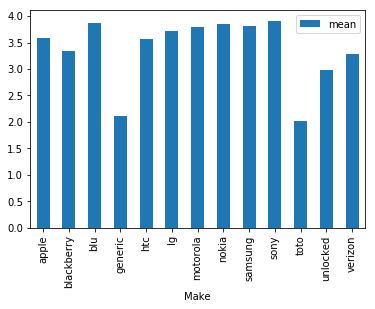

In [150]:
x.plot('Make','mean',kind='bar')
plt.show()

### WordClouds at Make level

In [25]:
from collections import Counter

In [64]:
from wordcloud import WordCloud,STOPWORDS

In [94]:
#Function to get all the cleaned words for a specific make.
def get_words(make):
    t_list = []
    for word in Full_df['cleaned_words'].loc[(Full_df['Make'] == make)]:
            t_list = t_list+word
    return t_list

### WordCloud for the reviews of Apple

In [96]:
#Generating list of words for the make 'apple'
t_list = get_words('apple')  

In [97]:
#Calculating the word counts
count = Counter(t_list)
for i,j in count.most_common():
    print j,i

10397 iphone
4677 new
4514 apple
3475 one
3275 great
2878 good
2824 use
2741 will
2121 unlocked
2076 product
1938 buy
1922 screen
1915 time
1887 dont
1819 got
1816 works
1751 really
1750 battery
1703 love
1702 bought
1694 work
1650 much
1639 used
1638 back
1626 even
1618 better
1601 now
1442 seller
1436 still
1381 well
1359 also
1325 apps
1295 amazon
1246 came
1236 want
1208 camera
1203 first
1163 android
1161 never
1086 everything
1072 problem
1039 price
1025 store
1013 cant
1010 condition
1007 money
1005 best
992 happy
991 sim
989 know
988 recommend
979 case
966 make
961 card
955 way
914 fast
912 need
912 didnt
910 purchase
909 said
885 ios
878 lot
869 day
865 people
850 without
847 think
843 life
835 box
833 using
827 att
826 since
826 doesnt
825 device
815 thing
811 problems
796 little
794 brand
768 received
755 working
753 quality
745 perfect
744 var
738 another
738 touch
738 made
736 service
724 say
718 old
711 locked
706 easy
705 going
705 charger
690 iphones
689 nice
683 days
6

43 suppose
43 january
43 abroad
43 messaging
43 click
43 crap
43 form
43 marks
43 crazy
43 dial
43 navigation
43 hardly
43 trip
43 interested
43 reasons
43 itll
43 attractive
42 beauty
42 feedback
42 continue
42 namely
42 excelent
42 owners
42 1080p
42 las
42 american
42 exceeded
42 attention
42 net
42 ringtones
42 shame
42 till
42 shocked
42 del
42 numbers
42 pleasure
42 dad
42 red
42 handy
42 audible
42 mainly
42 falls
42 state
42 telephone
42 swear
41 clarity
41 nicely
41 notifications
41 headset
41 bother
41 ebay
41 discussion
41 sturdy
41 innovation
41 extended
41 lame
41 helped
41 focus
41 outstanding
41 advise
41 april
41 smoothly
40 digit
40 everywhere
40 safe
40 displayed
40 systems
40 nightmare
40 noticeable
40 sooner
40 across
40 shopping
40 everyday
40 roaming
40 girlfriend
40 shattered
40 premium
40 para
40 lens
40 outdated
40 laptop
40 ultimately
40 edge
39 lady
39 tips
39 developers
39 buen
39 mint
39 stylish
39 pieces
39 move
39 checking
39 rear
39 operator
39 log
39 de

12 antennagate
12 burst
12 unlocks
12 installation
12 sticky
12 finish
12 duration
12 $35
12 ceased
12 bordered
12 catagories
12 anticipated
12 blindly
12 toward
12 tmobilethe
12 famous
12 scanning
12 guide
12 negatives
12 placing
12 $299
12 itthanks
12 korean
12 pristine
12 justice
12 gimmick
12 pixel
12 configure
12 venezuelan
12 relatives
12 sources
12 itit
12 devise
12 foil
12 sigan
12 ergonomics
12 thefts
12 annoyed
12 reference
12 ignorance
12 facts
12 batterywhich
12 tracked
12 second4
12 genuinely
12 goto
12 fanboy
12 sincere
12 ongoing
12 manufactured
12 opted
12 narrow
12 sudden
12 bloated
12 drained
12 engaging
12 unhelpful
12 express
12 doubles
12 pissed
12 meeting
12 slips
12 unnoticeable
12 specified
12 extensively
12 greyblack
12 profile
12 messing
12 concerns
12 promoted
12 school
12 kicked
12 join
12 heck
12 900
12 aftermarket
12 orlando
12 froze
12 itwell
12 virgin
12 networks2
12 operates
12 proud
12 geared
12 detect
12 youregardsstephanie
12 gimmicks
12 atti
12 blow

8 cvmonw6jbeahuxo3refreshpreplay
8 exchanged
8 extent
8 fiasco
8 documentgetelementbyidcvmonw6jbeahuxo3durationstyledisplaynone
8 letters
8 20112012
8 cvmonw6jbeahuxo3preplayparentnode
8 verify
8 unopenedi
8 disappoint
8 cvmonw6jbeahuxo3preplayonmouseout
8 covering
8 handful
8 boxed
8 pantalla
8 grateful
8 presented
8 buck
8 exceptional
8 shady
8 import
8 cvmonw6jbeahuxo3sowritecvmonw6jbeahuxo3flashcontent
8 pool
8 building
8 unblock
8 documentgetelementbyidcvmonw6jbeahuxo3chidivinnerhtml
8 5gb
8 excuse
8 recived
8 tries
8 cel
8 productgreetings
8 720p
8 ratings
8 shortcomings
8 peru
8 department
8 commercial
8 sealedwill
8 panel
8 cvmonw6jbeahuxo3rolloverimg
8 700
8 screw
8 stereo
8 processed
8 limitations
8 museum
8 llag
8 juicepack
8 diagnosis
8 whose
8 connects
8 likedi
8 mei
8 ware
8 yearand
8 cvmonw6jbeahuxo3resetplayerwhbwcc
8 cousin
8 failing
8 performing
8 nonsmart
8 gorilla
8 disgusting
8 buyingas
8 pero
8 map
8 documentgetelementbyidcvmonw6jbeahuxo3duration
8 summary
8 prote

3 ugh
3 bytes
3 sep
3 startup
3 outward
3 deactivate
3 bluetek
3 drunk
3 allegiance
3 recibi
3 simm
3 much3
3 debaclethe
3 tweaks
3 werd
3 collective
3 temple
3 santa
3 appsi
3 archaic
3 nieces
3 coursehaving
3 aerial
3 defines
3 fpresizeplayerspacecvmo3os0qimufcqwe
3 cameracons1
3 toggle
3 luxuries
3 postings
3 eve
3 knowledgeable
3 minipcfast
3 fone
3 les
3 boxi
3 unplug
3 recomendados
3 rode
3 educational
3 peck
3 2015
3 docs
3 earn
3 120910
3 suits
3 blocks
3 acordado
3 hilarious
3 curtious
3 detailing
3 anyones
3 colleagues
3 confortable
3 appealing
3 imho
3 reloaded
3 delayed
3 lined
3 stronger
3 cvmo3r9235xaj5ulnloadswfmovieid
3 unblocking
3 tlf
3 mailman
3 modificationso
3 expiration
3 responsabilidad
3 infinity
3 necesidad
3 flush
3 disbelief
3 slayer
3 unattractive
3 outlets
3 pictured
3 compete
3 itpros
3 rural
3 bottleneck
3 stinks
3 swappable
3 baffles
3 selleri
3 trajo
3 established
3 kudos
3 smoke
3 additionconcept
3 belonging
3 indifferent
3 companyi
3 gamble
3 grown
3 

2 exceptions
2 involve
2 untruthful
2 aging
2 faults
2 3g4g
2 spacenever
2 curiosity
2 shirt
2 cvmo3os0qimufcqwepreplay
2 familly
2 deca
2 fastb
2 confidently
2 wellalso
2 weakness
2 unsuccessful
2 ontime
2 aids
2 attplease
2 sturdiness
2 iso
2 bionic
2 hollywood
2 williams
2 purchasebut
2 analysis
2 $87803
2 oil
2 assisting
2 doi
2 doe
2 weakest
2 discontent
2 absoleto
2 stepping
2 debts
2 disconnecting
2 lettering
2 3days
2 inappropriate
2 oferta
2 speedsticks
2 wears
2 380
2 itworks
2 halfbakedthe
2 anythingperhaps
2 confronted
2 cobble
2 apparentaly
2 4gsits
2 cvmoj857shvjqa1sosetattributewidth
2 tint
2 proceeded
2 regretted
2 163
2 nowi
2 slr
2 seral
2 museums
2 frank
2 stressed
2 kim
2 glitchesi
2 aproach
2 yea
2 describedphone
2 sequestration
2 cvmo3r9235xaj5ulnpreplay
2 perfectrecived
2 3pm
2 dreams
2 massi
2 intermittently
2 disillusioned
2 zombies
2 periods
2 photocamera
2 fixable
2 chargingdata
2 aggravation
2 carte
2 reviewthe
2 sketchy
2 decisions
2 valentines
2 magazine
2

1 chineese
1 calidadel
1 training
1 misuses
1 punt
1 bothersome
1 routes
1 blackmarketed
1 hourslike
1 manufactor
1 mucha
1 buttoneasy
1 assitant
1 workiing
1 moneydamn
1 wireova
1 reopen
1 ons
1 summarize
1 ont
1 sofour
1 operable
1 responzable
1 biti
1 broadcom
1 laughingme
1 draft
1 camerait
1 shoppers
1 addicting
1 tdma1900
1 questionsone
1 anymorei
1 floppy
1 abe123you
1 fashon
1 usethere
1 timesdesignactually
1 herds
1 talkby
1 regardsromulo
1 down2
1 rmb
1 resales
1 worksvery
1 expensiveno
1 cradles
1 ratting
1 $1400
1 inmediatly
1 attachements
1 proactive
1 prospect
1 raines
1 fragmented
1 dirtybuy
1 fortunatelythe
1 kldajflk
1 sap
1 preservative
1 forjan
1 babysit
1 cvmoj857shvjqa1soaddvariableresetbandwidth
1 iphonewill
1 topselling
1 crooked
1 notm
1 funcion
1 $200250
1 lint
1 goodbye
1 lightingsi
1 discerning
1 operateconsfingerprint
1 wayy
1 abut
1 downloud
1 knee
1 evaluator
1 thsi
1 sums
1 us$750
1 not2
1 monththe
1 camry
1 thebest
1 outin
1 redirected
1 salt
1 textingha

1 selfportrait
1 intuitiveness
1 $$$thank
1 haunted
1 downtime
1 footprintthis
1 queueplease
1 storythe
1 inportant
1 proceededto
1 rerouting
1 usereallytotalling
1 respondbecky
1 410
1 meps
1 413
1 journeys
1 23rds
1 dsp
1 touchesthe
1 miserably
1 applemove
1 seperate
1 herefor
1 recomendablevolvera
1 torrents
1 miserable
1 promisedim
1 grossley
1 techniques
1 conditionhope
1 besties
1 costosos
1 unusedthe
1 tainted
1 drawn
1 iphonebought
1 formidible
1 disappear2
1 failings
1 clued
1 packagei
1 dtiker
1 intoi
1 year4
1 scratchits
1 downgradei
1 tryprosbeautiful
1 manka
1 downgraded
1 monumental
1 unopen
1 estuviera
1 tracks
1 $150$200
1 speekerrefubushed
1 morningtoday
1 bran
1 conditionwith
1 expectedinitially
1 softwareim
1 insertales
1 thatits
1 anither
1 guis
1 hubbys
1 documentgetelementbyidcvmoj857shvjqa1preplayimageidif
1 50100$
1 heals
1 telecommunications
1 podria
1 tahnkyou
1 maquinas
1 veio
1 plantas
1 venezolanas
1 condemned
1 apologizeexcellent
1 immoral
1 knowni
1 batte

1 increasingly
1 greatthis
1 jeje
1 distant
1 ingles
1 trustworthydefinitely
1 coordination
1 useful1
1 reviewhowever
1 vida
1 jeff
1 networki
1 killed
1 heavilyused
1 boxready
1 heremy
1 cvmo3os0qimufcqwepreplayonmouseout
1 pautado
1 attstill
1 yrold
1 craftsmenship
1 unseen
1 25gsm
1 constancely
1 revving
1 bordergreat
1 disallows
1 tablespoons
1 blackwhat
1 therein
1 estatic
1 reviews2
1 paymentand
1 shen
1 93g
1 conditionhas
1 shet
1 settingsandroid
1 scratchestwo
1 cleveland
1 playlistschange
1 longbut
1 valuesits
1 capinha
1 2012now
1 didt
1 warrantied
1 kettle
1 darkcall
1 cellstore33
1 hangup
1 rewarding
1 bestdeal
1 extactly
1 newbetter
1 boggles
1 goodlooks
1 wayim
1 feeing
1 reaching
1 electronical
1 aspare
1 waits
1 electronicas
1 revisado
1 golflogix
1 portabal
1 installedthe
1 cvmoj857shvjqa1sowritecvmoj857shvjqa1flashcontent
1 muting
1 beige
1 recognizes
1 350$
1 pistols
1 usadoi
1 moneyeven
1 times3
1 articulate
1 recomendadovan
1 couldny
1 refurbishedrecycled
1 srevice

1 transactionso
1 devastate
1 qa06livecom
1 permission
1 impracticable
1 formatfacilities
1 218
1 mmstruly
1 reactivatedthe
1 silk
1 chrom
1 elapse
1 honme
1 unlook
1 reasonif
1 satisfiedthe
1 conditionthanks
1 ecothis
1 fakecompare
1 callstext
1 severina
1 usefulthe
1 antibig
1 4g1
1 menssagen
1 scruffy
1 sellernot
1 batteryonly
1 scenes
1 $100000
1 redesigning
1 aydeme
1 ihospitalcomif
1 forthcoming
1 phoneconspoor
1 foundi
1 upleasant
1 fani
1 powerhouse
1 representatives
1 greatgenerally
1 disappointmentand
1 3g3g
1 httpecximagesamazoncomimagesi81ezit7ry2ssx320phcustomervideovignettepivideoreviewsbottombottomleft043ou01picustomervideoplaybottomleft13012cr0000png
1 metalbought
1 ikt
1 becoz
1 thatas
1 responsed
1 browserthe
1 responsei
1 defunct
1 folding
1 reverse
1 defectos
1 sgx543mp2
1 expectedwhich
1 anandtechcomoh
1 alos
1 prayer
1 collect
1 baltimore
1 outit
1 bumperfifth
1 newborn
1 satisfaccin
1 caked
1 shutdown
1 revews
1 posiblethanks
1 carrierthe
1 friendlyit
1 2562
1 im

1 welladditional
1 activatingmore
1 dayle
1 qualquer
1 tks
1 phoneoh
1 swypewatching
1 recipt
1 chelitza
1 ith
1 complaintthe
1 manufacturerthis
1 incessantly
1 tommoroow
1 poplular
1 cautioned
1 yetended
1 wool
1 dreaded
1 deseo
1 lighted
1 viva
1 pakaging
1 appschange
1 cordsit
1 ssl
1 devido
1 brightness5
1 notesthe
1 67i
1 itdoes
1 unfortunatelyi
1 boringi
1 videoand
1 problemlike
1 lifemusic
1 mapped
1 pricesthis
1 pants
1 unlicensed
1 problemsno
1 picnic
1 ken
1 uneconomical
1 $715
1 familiars
1 collects
1 greati
1 alphabetically
1 applefactory
1 chargerplease
1 circulating
1 wayi
1 commitmenti
1 unboxing
1 untrustworthy
1 fraudthe
1 compratodo
1 tookout
1 softwareother
1 comi
1 blackunlocked
1 respectible
1 bigtime
1 videoconscant
1 unlockedso
1 complainsthe
1 $335
1 dfice
1 fargreat
1 outthe
1 sloowe
1 compatible613
1 $440
1 moly
1 devrait
1 onesthe
1 20ppis
1 imaging
1 endeavor
1 forecasted
1 encomiendas
1 idealsa
1 quizas
1 reviewsiri
1 fortunatelyapple
1 inclusive
1 folkes
1

In [90]:
#Generating WordCloud
wc = WordCloud(width=3000,height=2000, max_words=1000, margin=20,
               random_state=1).generate(" ".join(str(x) for x in t_list))

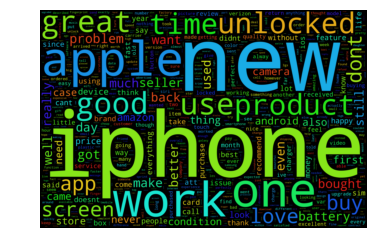

In [91]:
#Displyaing WordCloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### WordCloud for the reviews of Samsung

In [98]:
sam_list = get_words('samsung')

In [99]:
count = Counter(sam_list)
for i,j in count.most_common():
    print j,i

14621 one
14193 use
13694 great
13332 screen
13201 samsung
13019 good
12125 battery
12106 will
8128 galaxy
8120 dont
8082 time
7703 really
7488 even
7408 love
7400 new
6955 also
6790 android
6525 now
6474 much
6424 works
6379 work
6279 got
6204 apps
6066 camera
5970 still
5862 well
5759 bought
5757 iphone
5580 back
5529 better
5491 buy
5359 first
5207 note
5171 card
5170 used
4998 want
4946 need
4923 ive
4849 using
4760 features
4702 life
4550 best
4545 service
4487 fast
4470 easy
4379 problem
4315 day
4145 nice
4094 sim
4060 recommend
4048 price
4040 quality
3993 call
3991 cant
3941 product
3911 device
3890 everything
3884 amazon
3868 many
3855 make
3854 size
3642 big
3621 thing
3589 never
3589 way
3587 lot
3562 since
3546 little
3497 far
3494 know
3436 doesnt
3394 two
3368 calls
3343 without
3293 att
3270 say
3253 text
3241 unlocked
3237 days
3216 cell
3146 think
3094 see
3086 didnt
3032 another
2972 wifi
2969 data
2968 happy
2952 people
2944 came
2938 take
2934 app
2899 find
2862 ol

249 1080
248 changing
248 serious
247 include
247 solution
247 common
247 french
246 realized
246 zero
246 rooting
246 sellers
246 telefono
246 lol
246 fee
245 provide
245 fell
245 center
245 los
244 keeping
244 require
244 sealed
244 speak
244 pros
243 following
243 beyond
243 failed
242 swipe
242 conditions
242 loving
242 various
242 moving
241 placed
241 convenient
241 depending
240 pull
240 tons
240 obviously
239 therefore
239 location
239 jack
239 1080p
238 capacity
238 checking
238 style
236 1920
236 sandwich
235 comment
235 concerned
234 prior
234 america
234 vendor
234 lighter
233 $100
233 respond
233 processing
233 random
233 exchange
233 specific
233 trip
233 played
233 icons
233 somewhat
233 body
233 double
232 clock
232 impressive
232 enter
232 youve
232 chinese
231 perhaps
231 handset
231 rooted
231 menus
231 finding
230 costs
230 saved
230 whenever
230 brother
229 sturdy
229 hopefully
229 eventually
228 thus
228 sims
228 region
227 enjoying
227 required
227 bother
227 hop

67 swiping
67 estado
67 stands
67 operators
67 majority
67 repeatedly
66 intend
66 landline
66 gti9100
66 pulling
66 limits
66 rebooted
66 whatsapp
66 combined
66 walked
66 theyve
66 candy
66 restocking
66 tile
66 korea
66 236
66 remains
66 subject
66 fabulous
66 badly
66 consideration
66 genuine
66 gs2
66 technician
66 ignored
66 thousands
65 idle
65 wallpapers
65 gen
65 rapido
65 responsiveness
65 success
65 frankly
65 legacy
65 flashing
65 sight
65 answers
65 providing
65 expansion
65 beep
65 performed
65 september
65 customized
65 fresh
65 welcome
65 exist
65 spectacular
65 theyll
65 simpler
65 problema
65 watchon
65 alias
65 tied
65 gimmick
65 host
65 headache
64 errors
64 compass
64 paired
64 ensure
64 clip
64 vacation
64 payasyougo
64 frontfacing
64 cracks
64 batter
64 invest
64 respect
64 scam
64 navigating
64 3gb
64 processes
64 2mp
64 finished
64 persons
64 blurry
64 wider
64 tips
64 category
64 aluminum
64 vanilla
63 husbands
63 corporate
63 germany
63 taste
63 aps
63 avail


31 thinness
31 bullet
31 philippines
31 screeni
31 woke
31 satellites
31 fooled
31 satisfecho
31 migrate
31 nifty
31 blew
31 drove
31 craftsmanship
31 recipient
31 unheard
31 kat
31 dull
31 247
31 tall
31 widgetsask
31 tedious
31 wiped
31 paragraph
31 goods
31 train
31 ancient
31 flashes
31 unbeatable
31 socket
31 voiceplenty
31 urge
31 obtain
31 rolled
31 tune
31 sat
31 itd
31 sounding
31 portability
31 wire
31 1015
31 dealbreaker
31 eating
31 stabilization
31 addressed
31 contain
31 ending
31 lied
31 mile
31 scale
31 32g
31 querty
31 cleaner
31 dump
30 wednesday
30 bothers
30 webpage
30 touchy
30 respective
30 remedy
30 confidence
30 approx
30 cores
30 autobrightness
30 tunes
30 n900t
30 puede
30 itif
30 1136
30 elderly
30 swapping
30 satisfying
30 electrical
30 restaurants
30 pleasing
30 perfection
30 hair
30 blur
30 512mb
30 priority
30 wash
30 oznote
30 malware
30 rival
30 fairness
30 disadvantage
30 scanning
30 lleg
30 horribly
30 solavei
30 girls
30 tank
30 trojans
30 grow
30 ex

18 appearing
18 existed
18 shines
18 individually
18 ita
18 reveal
18 bricks
18 ross
18 reconditioned
18 wondered
18 couldve
18 magically
18 blu
18 nook
18 lg800
18 memorythe
18 exelente
18 texted
18 operativo
18 phonea
18 bread
18 club
18 gti9100g
18 phonevery
18 mist
18 grocery
18 hyped
18 converting
18 aqui
18 contest
18 builds
18 predict
18 designated
18 hd2
18 retailers
18 bested
18 excels
18 raise
18 2008
18 curves
18 voltage
18 lake
18 uncle
18 eternity
18 esn
18 fluke
18 australian
18 999
18 distributor
18 hacked
18 conversion
18 topnotch
18 disables
18 1046
18 tray
17 motorolla
17 italso
17 silky
17 mbs
17 accomplished
17 incremental
17 emulators
17 timeout
17 norm
17 recognizing
17 understands
17 scuffs
17 sunny
17 promotional
17 intelligent
17 cyanogen
17 notifying
17 production
17 drawn
17 faux
17 gui
17 soy
17 touchwhiz
17 snappier
17 podcast
17 snapping
17 fears
17 meanwhile
17 cradle
17 itim
17 skins
17 tint
17 spontaneously
17 funky
17 liberado
17 associate
17 presently

11 sample
11 spreadsheets
11 calander
11 phoneanother
11 inefficient
11 evidently
11 promising
11 vertically
11 pocketi
11 s4mini
11 waythe
11 evaluation
11 gigabytes
11 candle
11 composing
11 32gig
11 seguro
11 watches
11 admitted
11 screenit
11 midway
11 408
11 prevented
11 mud
11 newi
11 dashboard
11 hunt
11 operadora
11 lifethis
11 onthego
11 offices
11 1214
11 cast
11 decisions
11 buttonthe
11 $650
11 nonsamsung
11 comfy
11 electric
11 sweep
11 tothe
11 awayi
11 waistband
11 writer
11 attend
11 upand
11 disclose
11 enought
11 10gb
11 household
11 attracts
11 shopped
11 179
11 preform
11 iteration
11 overclocked
11 professor
11 flanked
11 incompetent
11 bandas
11 despair
11 phonenow
11 hides
11 itcamera
11 suggesting
11 16th
11 navigated
11 sparingly
11 critically
11 sluggishness
11 lanyard
11 tweaked
11 turnbyturn
11 archaic
11 kingston
11 recibido
11 repeats
11 $130
11 infrequent
11 verry
11 blamed
11 revolution
11 assembled
11 chime
11 $14
11 fork
11 $1500
11 execution
11 reseal

8 appalling
8 absorb
8 kik
8 falta
8 tougher
8 budge
8 travelingmy
8 jerrie
8 underlying
8 ese
8 eink
8 bud
8 triband
8 pride
8 boxwave
8 appconsthere
8 onif
8 nunca
8 elegance
8 docomo
8 bose
8 425
8 brightly
8 skipped
8 threaded
8 scheduler
8 schedules
8 applying
8 usted
8 likethe
8 grandfather
8 debated
8 gaming3
8 24ghz
8 userconsnone
8 melody
8 penalty
8 familys
8 stereos
8 license
8 obtrusive
8 instore
8 15gb
8 mountains
8 tofrom
8 puntual
8 confianza
8 refurbs
8 appi
8 goodlooking
8 5stars
8 jewel
8 recommand
8 perfectthe
8 velcro
8 twohanded
8 wells
8 systemthe
8 altamente
8 chassis
8 productsamsung
8 decia
8 win7
8 possiblestorage
8 impractical
8 wirefly
8 9005
8 interneti
8 whiz
8 storagei
8 priceperformance
8 mash
8 althought
8 gosh
8 sothe
8 muchthe
8 blacki
8 freight
8 qualitycons
8 banned
8 resting
8 sidebar
8 advertisements
8 race
8 everythings
8 hungary
8 expressed
8 gizmos
8 sg4
8 stare
8 disgruntled
8 hogging
8 $25month
8 u600
8 unneeded
8 chew
8 bane
8 gtb2710
8 obse

6 globally
6 weekly
6 heftier
6 fromthe
6 freethe
6 beaming
6 latinoamerica
6 tips1
6 cousins
6 estrellas
6 hollow
6 acceptance
6 owed
6 x497
6 palmheld
6 focal
6 40000
6 integral
6 refound
6 tpucases
6 disappointingly
6 recomendados
6 cvmo273rn1a2zk3g5preplaysrc
6 especial
6 blocky
6 coudnt
6 equilizer
6 autoreject
6 following1
6 megas
6 necessities
6 sghi777
6 i9000t
6 1024
6 acces
6 cvmo273rn1a2zk3g5
6 acer
6 paving
6 residential
6 foreseeable
6 trully
6 ala
6 reconstruction
6 datatext
6 experimentation
6 duel
6 offit
6 devicemy
6 fragility
6 stomach
6 oems
6 egregious
6 tainted
6 packagei
6 thy
6 phenominal
6 arab
6 dilemma
6 principal
6 unimpressed
6 progressively
6 tagged
6 nowit
6 hall
6 $$$$
6 tenia
6 llegar
6 useage
6 $19
6 anger
6 reappear4
6 estamos
6 lado
6 downward
6 hacks
6 smoothqi
6 wellbuilt
6 comics
6 credibility
6 evenings
6 doubted
6 minded
6 opting
6 s4processing
6 injury
6 centimeters
6 350
6 blend
6 poorer
6 410apn
6 governor
6 here6
6 phonesbut
6 modification
6 

5 depths
5 chipsets
5 circular
5 smarts
5 catcher
5 notsosmart
5 shockingly
5 deploy
5 allotted
5 presentations
5 recomende
5 fido
5 vida
5 againso
5 actualizado
5 talkin
5 24mm
5 faroverall
5 adopting
5 quibbles
5 happythe
5 sprintcom
5 minority
5 weeki
5 theni
5 s5i
5 stealing
5 cops
5 enabler
5 messagesthe
5 devolverlo
5 8530
5 38v
5 melted
5 pager
5 inspected
5 produto
5 refining
5 forthe
5 thoughtsthe
5 outlookexchange
5 goodcons
5 screensize
5 sgsiii
5 fongo
5 mam
5 firmwareos
5 isolate
5 itcall
5 2mb
5 timeif
5 jobthe
5 gpsno
5 protrudes
5 gti9250
5 pioneer
5 trdtrading
5 trabajar
5 strikes
5 sung
5 hideous
5 observationsthe
5 plastered
5 abandon
5 telco
5 learing
5 discouraging
5 laughable
5 assumption
5 orderd
5 dealbreakers
5 pearlescent
5 demasiado
5 $325
5 facade
5 amps
5 ubuntu
5 $89
5 taxing
5 21mbps
5 recargar
5 gti8190n
5 clipboard
5 factorthe
5 nitpicky
5 havethe
5 reloading
5 matt
5 unspecified
5 buyingthe
5 textmessage
5 mil
5 gts5260
5 neededthe
5 pcthe
5 15min
5 st

4 calculated
4 keywords
4 gallaxy
4 microcard
4 rushing
4 estafado
4 publicly
4 noteii
4 s738c
4 haywire
4 wantedthe
4 debug
4 $50000
4 itfirst
4 usecons
4 sumamente
4 float
4 5200
4 forgetful
4 gchat
4 anew
4 $116
4 weirdest
4 paces
4 117mb
4 lotthe
4 perceived
4 carga
4 negativaen
4 cvmo4931exqs9ws5preplay
4 casescreen
4 s390
4 partake
4 accelerated
4 05252014for
4 navegar
4 unimpressive
4 childish
4 halfhour
4 carp
4 caro
4 marketpros
4 1226
4 sght679
4 purchasethis
4 dayonce
4 successive
4 apologizing
4 carriersbottom
4 rocksolid
4 outyou
4 didthis
4 setport
4 joystick
4 adothe
4 ruled
4 leftover
4 fixedas
4 approximates
4 14day
4 screwdriver
4 neoprene
4 thatother
4 poped
4 whine
4 yuck
4 impulse
4 aldiko
4 neglected
4 onebill
4 piensa
4 problemsit
4 anyother
4 hardcase
4 calendaring
4 complied
4 damp
4 hoax
4 phonewell
4 overnighted
4 3gh
4 grossly
4 phonemore
4 ecosystemi
4 modelsthe
4 arrepiento
4 problemsif
4 dmczs10
4 stem
4 weigth
4 ache
4 hired
4 deberian
4 etisalat
4 naveg

3 powerhouses
3 director
3 useneutral
3 14hrs
3 chargercomputer
3 researchers
3 inthere
3 thereand
3 ramstorage
3 snatched
3 suuuper
3 6400mah
3 lycamobilecom
3 offical
3 text4
3 i607
3 otb
3 finale
3 dayone
3 crumpled
3 muchtouted
3 etceven
3 goodfair
3 vacationing
3 liars
3 tested2
3 phoneid
3 companyplease
3 suv
3 florence
3 plenamente
3 gurantee
3 azul
3 gallery12
3 launchershell
3 r1zjg80tomyeop
3 yuk
3 phonesim
3 phonesit
3 intolerable
3 loops
3 wayyou
3 finethings
3 seeming
3 356mb
3 253
3 shrunken
3 yearbut
3 everim
3 repeatersbuy
3 motivation
3 modeled
3 populate
3 iem
3 fpresizeplayerspacecvmo1wnzqwm3q91rv
3 gains
3 invoke
3 holsters
3 nice12
3 slackero
3 ringtoneringback
3 800ram
3 cvmo3fbzraec7gi72loadswfmovieid
3 foursquare
3 concurrently
3 chatbeautiful
3 norton
3 liquids
3 machinery
3 aways
3 unseen
3 dailing
3 reliance
3 speedily
3 servicethank
3 contrastnice
3 requirementsi
3 helpfulupdate
3 contrasting
3 asombroso
3 pipeline
3 buykeep
3 lifeherein
3 slowblockand
3 rea

3 unbelievablephone
3 phonegot
3 v235
3 nicebattery
3 serviceoperationthe
3 sprintfirst
3 websamsung
3 wii
3 600mhz
3 e105i
3 e105s
3 phine
3 pocketwithout
3 tampoco
3 skirt
3 decisionhere
3 fingersit
3 4gand
3 handand
3 lockbut
3 astronomical
3 picutres
3 boils
3 10912
3 bluegreen
3 handi
3 60fps
3 franciscocustomer
3 legions
3 multicolored
3 g900f
3 sensor11
3 lone
3 mustly
3 filthy
3 greta
3 etcand
3 spotters
3 emptying
3 epub
3 processorandroid
3 callssprint
3 encrypted
3 droping
3 c3050
3 saidoh
3 sanwich
3 themtyping
3 bloqueado
3 statistically
3 helpgps
3 cvmo1wnzqwm3q91rvcurrentclick
3 newzeland
3 itapart
3 orig
3 $25mo
3 quickrandom
3 monthive
3 lg420g
3 timeotherwise
3 mesmo
3 complaintsthe
3 fanatico
3 aroundin
3 fierce
3 spherical
3 spastic
3 enormously
3 mistakei
3 stratus
3 informacin
3 livid
3 awesome5
3 cvmo273rn1a2zk3g5soaddvariablecachecode
3 journal
3 sheriffs
3 adopters
3 articulate
3 nonatt
3 synthesizer
3 batterybut
3 usemost
3 ultima
3 ultimo
3 landlineand
3 reco

3 additonal
3 scientist
3 butive
3 issuesgood
3 voicebut
3 amazingeditso
3 trackertheres
3 escalations
3 t959v
3 phonetalkthis
3 realizare
3 garantizado
3 obra
3 appose
3 threat
3 informations
3 exspernce
3 cvmoqansb2q7dm4qloadswfmovieid
3 upgradehow
3 cellsamsung
3 leash
3 dowloads
3 cameraled
3 weightit
3 64mb
3 5363
3 likeley
3 hindrance
3 cvmo9ksca343lkqmsowritecvmo9ksca343lkqmflashcontentvar
3 unwrapped
3 1011
3 cartoony
3 pvz
3 layar
3 libraries
3 providerthe
3 io7
3 emailupdate
3 panther
3 cvmo1wnzqwm3q91rvloadswfmovieid
3 minii
3 wherei
3 wherej
3 unrepaired
3 oneway
3 810the
3 $1495
3 cheaplol
3 litter
3 prop
3 a197
3 zzz
3 goodtoo
3 withdrawals
3 fpresizeplayerspacecvmoiku1vagvlerp
3 esse
3 credible
3 stitcher
3 phonesas
3 wno
3 119
3 horribleit
3 gasoline
3 minisculethe
3 becarefull
3 slogan
3 minimizing
3 smartphoneit
3 altima
3 chimes
3 ramdisadvantagesno
3 grandes
3 cooperate
3 sead
3 appsok
3 quickstart
3 cheapersee
3 bezelthe
3 complicate
3 inlet
3 inconsistencies
3 tra

2 ittook
2 overallone
2 softfeeling
2 feathers
2 $800900
2 niggles
2 lightup
2 easytook
2 s3but
2 incomodidad
2 studiothe
2 bottomoftheline
2 $998
2 bsicos
2 phonetexting
2 iton
2 gadgety
2 casualties
2 phoneconsit
2 emailmy
2 themnanny
2 husban
2 fullday
2 tabletsinternet
2 cvmo2lpoh4dwmel2pnewheighth
2 espectivas
2 internationl
2 dispatching
2 xzibit
2 dustresistant
2 feelingthis
2 40s
2 oahu
2 cricketthat
2 goodandroid
2 sghi727
2 outpros
2 nite
2 hoursspeakers
2 picturesring
2 woander
2 hiccupped
2 connectionso
2 sodo
2 stitch
2 sucksalso
2 tints
2 195
2 illiterate
2 estafadora
2 mrszsnm3u2tuk
2 goodspeed
2 cvmo1wnzqwm3q91rvpreplay
2 230250
2 appswhat
2 colori
2 pkg
2 aboute
2 monthsthis
2 analogue
2 grandthe
2 minnesota
2 feb52014
2 plugins
2 retenido
2 customercentric
2 perfomed
2 lockunlockpower
2 400gpuui
2 deliveryi
2 upgradethis
2 blackberrythe
2 refundreplace
2 offall
2 timelove
2 directionsthe
2 cvmofwor5kdz8l4sosetattributeheight
2 insufficent
2 issuesit
2 hardtohit
2 4git

2 senti
2 httpwwwamazoncomgpmpdgetplaylistv2mzwmvap8lko3000000000000000000
2 edgeso
2 tecnico
2 knives
2 hershe
2 wifips
2 mitts
2 ownonly
2 teflon
2 plansit
2 contrasty
2 conspicuous
2 htci
2 pequea
2 chargehandy
2 cvmo166zejxjf0ag6
2 languageit
2 cableand
2 andmy
2 500ma
2 ancillary
2 2367
2 etc3
2 mashed
2 accessoriesknowing
2 xt720
2 functionalitiesi
2 xwkdd
2 927
2 prazos
2 goodthank
2 receptionother
2 parentheses
2 cvmoi90l1ul3szkoloadswfcoreswflocation
2 csdgprs
2 s4m
2 datei
2 downall
2 cellcom
2 callanother
2 shortening
2 bulkbut
2 fatfinger
2 networkatt
2 compile
2 sincero
2 trades
2 samsung2
2 cardbut
2 connectionset
2 pleasev
2 browserive
2 wizards
2 previewwith
2 perhapsalso
2 whybut
2 prevailpretty
2 brokeive
2 wifey
2 awayphone
2 dissappointing
2 simbased
2 perfectthanks
2 bebest
2 anymorepros
2 chrismis
2 rintone
2 joan
2 ipadandroid
2 s45
2 referb
2 5v1a
2 senseui
2 1000mini
2 oversize
2 ptp
2 problemand
2 brute
2 handcuffed
2 withfinalif
2 sucksenough
2 fricken
2 ther

2 gti9000m
2 elementsinterfaceface
2 milliseconds
2 smartphonepda
2 slipery
2 arrependo
2 comparacion
2 cvmo27zou4d2esaexnewheighth
2 interrupted
2 phoneunless
2 $12999
2 stickerthe
2 coldfustions
2 fffffff
2 unbeatablethe
2 obnoxiously
2 $198
2 $197
2 $195
2 $190
2 hand3
2 lasership
2 immune
2 madre
2 mandatoryproseverything
2 smarty
2 phonedisplay
2 literacy
2 unlimitted
2 chattingeven
2 ultimas
2 706
2 70$
2 cvmo2s6v1ozd12foa
2 serviceafter
2 clearsome
2 agony
2 stride
2 whishles
2 $80000
2 amazingtheres
2 linephone
2 101in
2 bigthis
2 ipv4proxy
2 cvmo15xjplncv3gyi
2 replysincerelyvanessa
2 v176
2 cvmo27zou4d2esaex
2 lehman
2 thts
2 definitions
2 chargesthis
2 reallypower
2 doablethis
2 corners4
2 databases
2 youtubepros1
2 gotton
2 injoyed
2 spacebattery
2 suckered
2 85090019002100mhz
2 buttonscontrolswidgets
2 sleekbut
2 cvmo2jigvv9w31n4bloadswfcoreswflocation
2 errores
2 cvmo2qdx6mskjerx7resetplayerwhbwcc
2 attlocked
2 appscons
2 blinker
2 onlyto
2 thesephones
2 wellrounded
2 ran

2 spiffy
2 appsthere
2 jackpot
2 reallmente
2 wifione
2 referbished
2 settingsstatic
2 cvmo2dai6jizz58xisosetattributewidth
2 amdroid
2 painless3
2 reconize
2 intervening
2 flipbook
2 btl
2 unravel
2 greatful
2 novalauncher
2 websitedidnt
2 recorders
2 rams
2 eto
2 etl
2 youupdate
2 4gthank
2 talkerbrowserstreamer3g
2 cinema
2 incompatable
2 smartphoneish
2 2010the
2 iteverything
2 purchaseone
2 fastthese
2 menusthe
2 smarphones
2 sadi
2 putzing
2 afghan
2 bicycling
2 negligence
2 qualitybut
2 goinge
2 facebbok
2 wrks
2 lookingscreen
2 ayni
2 viewereditor
2 countingwhat
2 maven
2 youtubecom
2 regreted
2 obtener
2 awkwardalso
2 slipperyi
2 roads
2 720x480
2 customizationhaving
2 cvmo2qdx6mskjerx7sosetattributev
2 informational
2 monthnow
2 unwatchable
2 consumersthe
2 exigentes
2 oring
2 eos
2 abhor
2 300advanced
2 relationships
2 bludgeon
2 ergo
2 earlierall
2 laterit
2 gps3
2 androidpowered
2 pricethey
2 phoneo
2 moreweak
2 weekconslayoutease
2 nowive
2 interno
2 networkbut
2 nonmarke

2 limps
2 sk3
2 servicegalaxy
2 thatto
2 displaylarge
2 supersaturated
2 dallors
2 leak
2 ssmsung
2 leas
2 thoughscreen
2 murderer
2 11i
2 receivemake
2 callsover
2 southamerica
2 goodupdatecompany
2 epiphany
2 browsingit
2 hadntpower
2 performanceupdate
2 worsethe
2 picturesit
2 timebreakdownscreen
2 picturesif
2 agradecida
2 yetthis
2 wating
2 instructive
2 cored
2 inquisitive
2 buffs
2 iphonemy
2 nonoriginal
2 assorted
2 juno
2 beastit
2 vistanetworking
2 littlethe
2 expands
1 givesit
1 setupwell
1 mrbigaxe
1 nycsamsung
1 201209ive
1 umtc
1 toogames
1 wifithanks
1 keepsit
1 prendeel
1 overnight2
1 sleekinitially
1 speakerproblem
1 ultimatley
1 lifelast
1 localized
1 yorkdelaware5
1 scoll
1 sadedit
1 data5gb4g
1 bocky
1 supportdear
1 alphabetic
1 tai
1 hermano
1 batterybigger
1 dertimine
1 israel15
1 20good
1 wifiexcellent
1 desirehd
1 820
1 abances
1 usaprompt
1 ubema1
1 intruduced
1 phonesafter
1 wooded
1 mistakesthe
1 grueling
1 acknowledgethe
1 spha460
1 330mb
1 libiano
1 timesvo

1 120240
1 likeapn
1 jobsincerelyhelen
1 incompatibilities
1 needmy
1 restjust
1 workingbut
1 8125
1 mediumbig
1 perfectc
1 agreepros1beautiful
1 psimo
1 offfreeze
1 everyoneespecially
1 frustratinglost
1 6810
1 s4android
1 phonebunch
1 protecters
1 americawith
1 goodinternational
1 qualitativevery
1 picturecamera
1 infect
1 devicesenough
1 likethat
1 brigthness
1 fritz
1 i8190it
1 wirelessunlocked
1 savedi
1 dateworks
1 friendpros
1 microsdhctm
1 misleadingsadly
1 againapart
1 osas
1 deathprospretty
1 evooccasional
1 taxthis
1 lightphysical
1 pc445
1 ectbut
1 experance
1 250300
1 mannerthe
1 winnervery
1 12lb
1 binding
1 s7582
1 noveltydisplay
1 amazingmega
1 hearexcept
1 thingsgreat
1 contractinexpensivemakes
1 wouid
1 ricaalguno
1 likeas
1 routersoverrall
1 700pm
1 dockconstructionthis
1 lesserquality
1 easyquick
1 timeotherwise1
1 behemoths
1 thougheditafter
1 smootly
1 cavaet
1 ownedive
1 specimen
1 cheapeta
1 smartstuff
1 honesly
1 airsamsung
1 jobsee
1 barsmiley
1 wholesome
1 ra

1 difficultnot
1 methey
1 callcan
1 sparing
1 triedsure
1 assemblers
1 thereperfect
1 diedamazon
1 behindiphone
1 loveorhate
1 10999
1 islateral
1 lessdo
1 rootjail
1 likethis
1 rendition
1 pluswifi
1 carryready
1 devicefront
1 looking2
1 one91912
1 cvmoiku1vagvlerpsoaddvariablev
1 assurion
1 1302012
1 26gb
1 sharpclearand
1 qualityclarity
1 complainsshipping
1 nicerwe
1 2screen
1 malfunctioningso
1 fingersmy
1 timeaugust
1 sdhfioerh
1 worldwidethis
1 wiresless
1 rented
1 tooprosscreen
1 timeturns
1 doablecamera
1 prayed
1 hotlines
1 otherwith
1 applicationsbut
1 testsit
1 europeambut
1 romnote
1 disease
1 lijero
1 conversatingeverything
1 documentgetelementbyidcvmoz5cmwa0svrh4hiddenpreinnerhtmlcvmoz5cmwa0svrh4refreshpreplay
1 same11
1 performed1
1 joinedtook
1 separatelythe
1 callsloving
1 reallykeep
1 422plenty
1 customizable10
1 approxmately
1 displayconsio
1 othersbut
1 intothe
1 goodeverything
1 documentgetelementbyidcvmox5xf4rsaimz9hiddenpreinnerhtmlcvmox5xf4rsaimz9refreshpreplay

1 ankles
1 flyi
1 orderwhat
1 brasileiros
1 romsextra
1 pursuits
1 goodalso
1 contentthis
1 vibrantmulti
1 290$
1 headphonesnote
1 welll
1 gleaned
1 time8
1 flipphonewhen
1 dualhinge
1 notificationsthe
1 granddaughters
1 applicationsthere
1 cheapthin
1 sda
1 wellright
1 morecompact
1 provavelmente
1 suckssignal
1 cabletried
1 undated
1 clamshelldesign
1 texasin
1 doorthats
1 flyyes
1 epicbut
1 encontre
1 bleaching
1 netbooksi
1 78m
1 cutei
1 sizequalityoverall
1 computertablet
1 selfobsessed
1 lowfor
1 code8
1 resumed
1 awayhas
1 cvmo1dgdezncjwzt0soaddvariableoldfirefox
1 blockedand
1 galling
1 russianso
1 reviewphotos
1 telephonic
1 timeo
1 caseplastic
1 daynight2
1 protectorswhat
1 prudence
1 nokiabut
1 bigbuy
1 unclaimed
1 itemthank
1 consfeeldesignthe
1 neccesary
1 sturdylarge
1 list5
1 obeying
1 sosd
1 situations6
1 dayconclusion
1 latermerry
1 sosi
1 nullhow
1 toofyi
1 firstof
1 rootmore
1 yostervillamizarhotmailcom
1 rootedand
1 cameraonly
1 electrics
1 usnoneuro
1 resetyou
1 th

1 eurpean
1 7295upload
1 misusejust
1 useperformance
1 downgradeswap
1 susie
1 snoozed
1 interfaseupgraded
1 flashlights
1 finegot
1 connectivityclass
1 spacea
1 tripleflex
1 20w
1 crackthe
1 defectupdate
1 defecting
1 20a
1 20c
1 grippinessshortcuts
1 mobile5x6x
1 harley
1 greatget
1 emailstextscalls
1 flirt
1 morebrowser
1 $684
1 website9132011
1 foreigner
1 compatiblejust
1 acumen
1 monopolioandroid
1 contactsthis
1 trillian
1 208
1 application3no
1 41so
1 whizz
1 itworth
1 abilityhowever
1 screenuniversal
1 radioactive
1 sayingour
1 bangin
1 blackerrys
1 alarmbe
1 badley
1 wifispeaking
1 crashglitchfreeze
1 overheatshutdown
1 thiscomment
1 warrantyhow
1 anyway5
1 puntuacion
1 enjoye
1 usbmicro
1 appealingits
1 typingrandom
1 kwow
1 documentgetelementbyidcvmo1ntxgrapvjvtcduration
1 stopwhat
1 coolspeaker
1 lifeim
1 extremnely
1 mapmyride
1 shellwhat
1 206ppi
1 letter5the
1 evohad
1 stormy
1 capitvate
1 $1001000
1 thingsaccess
1 documentgetelementbyidcvmo1p5r0ygyb2xkjchidivinnerhtml


1 orderedeverything
1 commenters
1 sizebuildsolid
1 brohter
1 corners3
1 builder
1 misin
1 publicadas
1 kknow
1 recommendedthe
1 multibilliondollar
1 markedup
1 countryfrom
1 storeu
1 leftring
1 typenot
1 itget
1 numbering
1 nicknamed
1 theroy
1 wirelesscingularcomport
1 t609
1 nails2
1 65lb
1 smark
1 featureswatchon
1 moresopocket
1 moreif
1 koreano
1 gma
1 volclaritybavoice
1 demographic
1 notsogoods
1 beforesamsung
1 280
1 softspoken
1 284
1 286
1 $700hope
1 hardcoremovies
1 store4
1 manjo
1 entrepreneurial
1 translatedthank
1 areasdata
1 hootsuitesend
1 wiling
1 memorygot
1 $53400
1 300pm
1 minuteslike
1 hacerantes
1 marketthey
1 reviewersotherwise
1 muchawaited
1 clearwindows
1 122312the
1 affiliatei
1 ordeali
1 chick
1 way15
1 wellreception
1 way11
1 droidandroid
1 heyim
1 haif
1 dailyfactor
1 classical
1 righthanded
1 tetheringbottom
1 nfcgoogle
1 hail
1 lifebuy
1 functionalitycons
1 pentec
1 butso
1 prosim
1 2013by
1 levante
1 sleepgoogle
1 capabilties
1 shabang
1 etccell
1 rid

1 buttbrowsing
1 mhzhspa
1 galaxygreat
1 editionable
1 itselfyou
1 takegraphicsscreen
1 pooch
1 accessoriesoverall
1 in19
1 foundanyone
1 accuracy6
1 bothin
1 rarley
1 primebecause
1 purchasecome
1 $five
1 ultrame
1 exceptionalthere
1 free7
1 fastbecause
1 greatquality
1 free4
1 chargetotally
1 functionstoo
1 countrynetwork
1 google2
1 6192012
1 onesvoice
1 weeksthat
1 voicemailthis
1 chargingquoted
1 dishonestybesides
1 telnavcall
1 openedbottom
1 11172012
1 11172011
1 deliveredthis
1 dobest
1 idispensables
1 qualityboth
1 functionalthis
1 3252013
1 welloh
1 useqwerty
1 oftennice
1 $102150so
1 amoleddisplay
1 linen
1 thers
1 iphone4s5
1 wiseedit
1 41longer
1 yesas
1 yesar
1 itdefinitely
1 fortran
1 notate
1 music35mm
1 wirelesstelecom
1 morfe
1 crazywhich
1 phoneworkaround
1 switchotherwise
1 thissincerelylorena
1 importantfor
1 inplica
1 capactity
1 chargedto
1 occupiedlol
1 pequeoaun
1 shoppingusing
1 occupied4
1 webpagein
1 accentuated
1 timeordered
1 5sbetter
1 doses
1 grafittied


1 seminars
1 5so
1 haya
1 aslike
1 slowinternet
1 surei
1 betathe
1 upgradeand
1 insturctions
1 acclaim
1 10min
1 carddelivery
1 calldropping
1 phonevirtually
1 downlow
1 inventorythe
1 cheapsimple
1 aaps
1 tmobileoct
1 qualitatively
1 functionalityslight
1 userthe
1 describedin
1 hoveringthe
1 z30
1 finephone
1 okit
1 spedning
1 goodsize
1 occasionallyalso
1 videoclip
1 refundwhen
1 infurating
1 doid
1 doif
1 kindthis
1 contractmore
1 nextand
1 doin
1 mystique
1 m340
1 moneyprosvery
1 occaionally
1 lighta
1 buttonvolume
1 dois
1 putout
1 fencestill
1 blurryobviously
1 viewhowever
1 pleasedquick
1 retrasos
1 cps
1 lpn
1 gramsthe
1 settry
1 lovehatred
1 androidmarket
1 thiscontinue
1 pantechhope
1 specificationsi
1 advisory
1 greatslot
1 golarger
1 reponsable
1 documentgetelementbyidcvmo33vgda505s8v2duration
1 r2i22x4le3l5a1
1 easeadd
1 cwmtwrp
1 usecomplaints
1 lcd1536
1 distancesconclusionthe
1 uimay
1 bugladen
1 airtimephone
1 websitesamsung
1 activitated
1 apagarse
1 figueroa
1 thec

1 modelnow
1 openthe
1 1thats
1 accessorythe
1 kiddies
1 plagues
1 practicalwhat
1 5ps
1 uponce
1 casemates
1 xpvista
1 contradicting
1 workfinally
1 italythe
1 lagso
1 unlockedproduct
1 multivoltage
1 capablelets
1 needswindows
1 amazoncomit
1 relevance
1 hugeim
1 pantalon
1 daysbeautiful
1 efetivamente
1 yak
1 jenningsmedia
1 adiquite
1 doneedit
1 demanda
1 dimgoes
1 gojng
1 usernamepassword
1 1gband
1 criticalso
1 30second
1 cablecamera
1 noniphone
1 deadused
1 featuresdisplay
1 data2
1 phabulous
1 dissapointments
1 sizeresolution
1 micromanaging
1 pantallagran
1 ttthe
1 erroring
1 dumbest
1 tookpictures
1 cameramode
1 862013
1 vendedorbuen
1 sheesh
1 amicable
1 lagbuild
1 nethome
1 durablei
1 callits
1 marketslim
1 itemregards
1 callssometimes
1 darkthe
1 rmdir
1 prosecuted
1 milei
1 august2013
1 offcontract
1 sharealexander
1 programsas
1 machin
1 flatwireing
1 inpreloaded
1 reconsiderthank
1 swicthed
1 honestthere
1 onscrolling
1 sigh2
1 itunesafter
1 memory11gb
1 stupidplease
1 

1 buyershence
1 11052011well
1 realizable
1 fizz
1 reciews
1 daythese
1 toowatching
1 phonehow
1 esposo
1 supersharp
1 batteryhere
1 dooped
1 backvalerie
1 annoyingplus
1 phonetalking
1 120f
1 productmy
1 expensivecomet
1 genocide
1 80and
1 communitynote
1 someimes
1 360and
1 downloaded2
1 htcmotorola
1 ringtonecall
1 generosity
1 solucingood
1 outrageousso
1 gpsair
1 coby
1 releasedscreen
1 marketthats
1 pioneered
1 meanfrom
1 sprintbtw
1 comingll
1 lessthe
1 qualitybluetoothit
1 meproprietary
1 cvmo5epenp3v0hxhrolloverimg
1 whatsoever5
1 whatsoever3
1 pearlon
1 workedby
1 customerblutekusa
1 chargerwhich
1 $200not
1 mole
1 issuefollows
1 handsview
1 hurry4
1 100tax
1 callersbonus
1 e250s
1 processorgood
1 estose
1 smallgood
1 havesupport
1 blending
1 perfectmaybe
1 movile
1 mail8
1 itcompr
1 dormroom
1 caribecell
1 lucktheres
1 warrantymost
1 whatsoeveri
1 flawlesslycomes
1 doornail
1 whatsoevera
1 vacationand
1 recorderanother
1 minute365
1 facebooksnapchatinstagram
1 kawiibearhotma

1 timbucktoothe
1 choiceif
1 soundclear
1 opensource
1 therewhile
1 liersi
1 cheapass
1 jelatin
1 blackas
1 autofocus2
1 herehavent
1 liiittle
1 minservice
1 holdnot
1 whitetrash
1 scytho
1 clicksthe
1 useexternal
1 whiteonly
1 sincehere
1 callsthese
1 thimgs
1 grazed
1 functionsbut
1 usba
1 1241
1 productv
1 dollarswhy
1 videosbecome
1 figurebrowser
1 spottransition
1 celltowers
1 talkingobviously
1 instructionsmanualswarranty
1 grained
1 phoneinternal
1 clout
1 paralleled
1 onethen
1 bouygues
1 inutes
1 nonstoptries
1 sixyearold
1 deos
1 modeprosfastest
1 edit12292012
1 176x220
1 amazonbasics
1 dagain
1 doeswill
1 dounfortunately
1 mvpconnectivity
1 bthe
1 jackcharging
1 lessim
1 homeso
1 regualarly
1 abroadwhich
1 tennis
1 sidephone
1 textingeasy
1 clearprobably
1 producted
1 grove
1 usedno
1 speedbetter
1 mecould
1 mitsubishi
1 interven
1 100s
1 horryble
1 launchthe
1 wellvery
1 smartfhone
1 presentaproblemas
1 oportuamente
1 miinutes
1 donut
1 touchwizsamsungcertified
1 importado


1 viethe
1 middleofnowhere
1 ecaudor
1 calling2time
1 22day
1 negativesfinally
1 offvoicemail
1 examplehope
1 mongo
1 poorcant
1 boxgalaxy
1 itcamerait
1 cvmo12a3gftxrm70csoaddvariableresetbandwidth
1 13500
1 dpidio
1 sectionspackagingi
1 clearlike
1 holdcarry
1 lighht
1 rays
1 lifemicrophonehad
1 boxes2
1 pina
1 cvmo3jzv7dmxl581tsoaddvariableswfembedtime
1 multitaskingthere
1 batteryreceiption
1 reasonablypriced
1 wordofmouth
1 pathway
1 removednow
1 pint
1 wantprice
1 appstoo
1 5yrs
1 innaccuratei
1 quadcoreare
1 toworld
1 service5
1 carmera
1 openplease
1 reeeeaaally
1 jugarsoy
1 recomendadofunciona
1 casegreat
1 backthanksamazon
1 hasyou
1 jair
1 handsfor
1 handoperates
1 from100
1 tudia
1 pin1
1 processorbright
1 busier
1 canberra
1 doashipped
1 entryway
1 amarrado
1 twocall
1 differe
1 wellalson
1 12minutes
1 yapper
1 marshmallows
1 datlol
1 sgp5
1 addedchanged
1 havedo
1 pixilation
1 friendlyunlocked
1 smoothin
1 screennavigating
1 4ltethis
1 navithe
1 seethis
1 decidirme
1 numb

1 bunck
1 imagecvmo3fbzraec7gi72rolloverimgsrc
1 jardinepatten
1 brian
1 s2also
1 unquestionably
1 s5830ithank
1 yayyyyy
1 surprisinglygoodi
1 tocare
1 twobutton
1 perfectoverall
1 montenegro
1 muddle
1 1there
1 1024x768
1 expeded
1 s3basically
1 mandate
1 damageworst
1 essentialthe
1 headphoneof
1 againbrightness
1 situationsits
1 thoughwireless
1 roundtrip
1 heightit
1 sgsiiithis
1 handiest
1 misting
1 idioms
1 stoppedi
1 whilethanksmaysam
1 froyocamera
1 hydrophonics
1 blackthere
1 smartpay
1 thanksbecause
1 oftensay
1 receipt2
1 batteryexpandable
1 combinationdont
1 isucker
1 disgusts
1 defend
1 ebaythe
1 programanker
1 ret
1 wholly
1 accessoryi
1 systemsuper
1 ren
1 reo
1 rem
1 httpecximagesamazoncomimagesi71kaeqwgessx320phcustomervideovignettepivideoreviewsbottombottomleft043ou01picustomervideoplaybottomleft13012cr0000png
1 fondly
1 everythingalthough
1 wp8s
1 notsosmall
1 receipti
1 mostr
1 colorgood
1 $24900
1 wasmessed
1 confirmingkathy
1 retards
1 pintrest
1 minikeypads
1 rec

1 nbcs
1 courseandroid
1 itdata
1 transferencesapps
1 reinforcing
1 pluggingi
1 phonehats
1 devoverlo
1 returnbut
1 iconsthe
1 complaintsthis
1 constate
1 2x4
1 cameratalking
1 rating93
1 agradecidalo
1 noticed6ics
1 anymoredurability
1 simplemte
1 75c
1 bussinessso
1 birthdayi
1 gs4tried
1 landmisc
1 betterhalf
1 promocell
1 lotsometimes
1 refinements
1 detectable
1 sizecost
1 jeddah
1 momentive
1 sodont
1 unpolished
1 checkcompare
1 pes
1 bagthats
1 transferactivation
1 islide
1 areawitch
1 networkmarket
1 cvmo348c4ktulz1n6preplayonmouseout
1 5455
1 modelsthat
1 scrachs
1 masterypeople
1 estba
1 isthats
1 notas
1 featuresby
1 activestorageagain
1 purchasedsince
1 servicepros
1 naples
1 wayspecification
1 cruzin
1 amazonsandra
1 cvmo5epenp3v0hxhsoaddvariablecachecode
1 samsunggeneric
1 t210
1 include1
1 phone10
1 phone12
1 1560
1 announcedphone
1 sulhe
1 biendesde
1 gram
1 photosfiles
1 waitijg
1 productivityi
1 $150its
1 routeupdate
1 5km
1 docsits
1 departmentsthats
1 1912i
1 intrig

1 sleeknesssofar
1 hasten
1 n823g
1 navigationim
1 sindle
1 ongo
1 padi
1 trouble16
1 forworst
1 quality060413
1 dark16
1 volumewise
1 checkbut
1 avert
1 greeeeaaaatpro
1 diligent
1 monopolies
1 menutoolscamerai
1 textscustomize
1 4hr
1 notthey
1 pressures
1 sensitiveoverall
1 thinawesome
1 playbackas
1 fromthrough
1 notthen
1 cubby
1 cvmo5epenp3v0hxhsoaddvariableswfembedtime
1 jeansthe
1 pocketbill
1 onlythere
1 memorydid
1 presoak
1 httpwwwamazoncomgpaagdetailsieutf8asinisamazonfulfillediscbamarketplaceidatvpdkikx0derorderidsellera1qps08k9fkknfsshmpathreturnsaagreturns
1 messagingretrieving
1 silentringer
1 esthetic
1 laptopmy
1 sweeeetnow
1 theirsthis
1 appending
1 tolet
1 frequentlytough
1 newvery
1 ring3
1 ring2
1 macedonia
1 diversions
1 wronghope
1 purchasesthis
1 stuffthis
1 it1414
1 exitoso
1 mangowireless
1 perfectlyhope
1 hate73013
1 addremove
1 cvmo3jzv7dmxl581trolloverimg
1 deleteddoesnt
1 androidsps
1 issueshaving
1 onmovies
1 periodbesides
1 gleaming
1 toddlerproof
1 unc

1 mentionedi
1 largeit
1 asembled
1 $40300
1 lookwidgets
1 pleaded
1 offalso
1 flexibleconsfront
1 juliomoraiicaint
1 soandso
1 reviewplease
1 hd4thoverall
1 sucsess
1 widgetstransferring
1 factoy
1 excessivelysound
1 nonremoval
1 ordained
1 35calls
1 phoneunder
1 recommendedsmartphone
1 systemfast
1 finemy
1 diceo
1 startled7
1 parkrowwireless
1 offlast
1 offnetwork
1 taxbut
1 heyyy
1 rfs
1 crp
1 dropsnobody
1 memmoryi
1 listive
1 terrifically
1 postit
1 remembertracfones
1 powerbattery
1 breaklike
1 quickstarts
1 upbattery
1 appologizing
1 correspondent
1 plansuper
1 realcamera
1 sindrome
1 moreging
1 emai
1 kidlike
1 revisarlo
1 rdiospotifyrhapsodyoh
1 insideits
1 monsteri
1 minutesoverall
1 weirdwhen
1 478
1 taxt
1 drafting
1 webrowsing
1 15hour
1 parcelvery
1 vergleichbares
1 cvmoqansb2q7dm4qsowritecvmoqansb2q7dm4qflashcontentvar
1 balk
1 freecrippled
1 pastie
1 nuisances
1 handbagfor
1 screeches
1 xhope
1 incrementation
1 documentgetelementbyidcvmo44w5amdym26zdurationstyledisplay

1 anythingbest
1 $7330
1 quaint
1 convertible
1 imagesgood
1 finoo
1 overestimated
1 indagado
1 foer
1 prevailwhile
1 instruktion
1 certainlygood
1 handswho
1 t109would
1 wantafter
1 versionsometing
1 elsewhereremember
1 farsar
1 supportedit
1 gasped
1 perpous
1 oneweek
1 lotbest
1 22014i
1 teflonlike
1 pictograms6
1 rediclous
1 freakish
1 phonereceived
1 cvmo12a3gftxrm70camplayerprod
1 funcionara
1 sleezy
1 pouchthe
1 handprinted
1 fouri
1 earbudsmicrophone
1 sealedthe
1 macdonald
1 amazingmagic
1 conversationdo
1 callsstrong
1 germans
1 venezolanas
1 plastic2the
1 igadgitz
1 estaban
1 decharges
1 ago2editing
1 valuefor
1 basisi
1 general45
1 accountanother
1 hitonly
1 warmth
1 insidethank
1 swipekeyi
1 decentalso
1 perfectossaludos
1 droplets
1 2422
1 irresponsive
1 screenwell
1 tmobilecomactivation
1 fest
1 insteadif
1 terriblei
1 addressdont
1 meyer
1 flawlessease
1 monthchanging
1 batterymodem
1 conviction
1 simlock
1 repack
1 ontexting
1 textor
1 nothingthan
1 cvmo2lpoh4dwmel2pso

1 withim
1 iphonewhich
1 willupdatingsyncing
1 arentone
1 universitysponsored
1 withis
1 accountcalled
1 tada
1 10widgets
1 insteadas
1 cherished
1 twotoned
1 doesbig
1 workinghowever
1 raysouround
1 fyiweight
1 rpidoen
1 upwould
1 sinal
1 detailsfor
1 cellphonemust
1 bogussss
1 appearsregarding
1 duly
1 worlduranus
1 weeksanother
1 androidwith
1 harming
1 adequateeverything
1 construction5
1 immediatelybut
1 intuitiva
1 mobilephone
1 transferreduh
1 mistakesi
1 movistarspanish
1 ringring
1 shapesize
1 cellphoneexcellent
1 iphoneone
1 demensions
1 convex
1 amazingregarding
1 concernsi
1 proteger
1 apnwap
1 iapp
1 normalold
1 apropos
1 annoyingfinal
1 gecko
1 negativevery
1 straitjacket
1 cvmoiku1vagvlerpsoaddvariableresetbandwidth
1 workingit
1 buttons2
1 intendplease
1 nabbed
1 dialtonedo
1 devicesmy
1 angrybird
1 chargeswhile
1 useimpressively
1 2app
1 staticit
1 nouns
1 problemsthen
1 pretended
1 frances
1 updatings
1 validity
1 depressibility
1 workingtouch
1 europeread
1 hasscellf

1 nowsimply
1 ownedworks
1 fsg
1 prices3mini
1 settingsokay
1 thelists
1 caretldr
1 ownedfast
1 chargingpicture
1 affirmed
1 wantbrowsing
1 tingling
1 therecall
1 boomer
1 managei
1 stuffnot
1 pulgadas
1 soooowe
1 sayingso
1 pb11barquisimeto
1 gpsmid
1 lagridiculously
1 goodheck
1 conditioner
1 fragilemenu
1 slipon
1 quickmessaging
1 burnout
1 gosim
1 featurelockscreen
1 othersyou
1 slimequals
1 sureunfortunately
1 greatwhy
1 403cons
1 deselects
1 4xwhen
1 helpsover
1 brazillian
1 listeningstandsboth
1 soapy
1 encryptedverizon
1 scratchpad
1 manage6
1 gti91100
1 functionsto
1 swipei
1 soonfunciona
1 nightmareon
1 themcant
1 estability
1 cleaners
1 zeronoproblems
1 keepers
1 ites
1 timequad
1 msm7625a
1 internationallythere
1 lowrent
1 cvmo1w0fyqu8dgzqwsowritecvmo1w0fyqu8dgzqwflashcontent
1 httpwwwamazoncomsamsungillusion2400mahextendedsami110batxdpb0093bju5srefcmcrprproducttop
1 downwload
1 flashmy
1 gamingbut
1 awayspenscreen
1 xdait
1 speedifanyone
1 nexusnexus1whenever
1 beenstolen


1 worksps
1 indoorsoutdoors
1 holdercons
1 40app
1 traslada
1 traslade
1 33000
1 wp7second
1 priceproduct
1 sandwichics
1 iphonesthe
1 easierthis
1 nevertheless5
1 olderthan
1 androidconsbattery
1 $52900
1 scracthes
1 disappointedupdate
1 equalemail
1 starsthanks
1 bundlemy
1 companiesthis
1 purplish
1 580
1 promocionaban
1 portriat
1 applicationswhatsapp
1 rdsgps
1 588
1 occurance
1 viber7
1 mebonus
1 numbersan
1 cellmaster
1 undertakingwhat
1 micthe
1 powerwakesleep
1 corse
1 techo
1 optionscall
1 agrado
1 snorty
1 tollerable
1 fatigue
1 starbuckers
1 unspent
1 scalding
1 peopleregarding
1 86th
1 monthsthen
1 boardsi
1 thatnice
1 fleshed
1 callshould
1 righthave
1 11302012
1 upddating
1 upscaled
1 tabletmy
1 processorcustomize
1 activatedever
1 remadies
1 amazonits
1 imagecvmo2s5nrmuohcvz7rolloverimgsrc
1 multilayered
1 swept
1 nexus14
1 meupdatemy
1 codeagainst
1 laptopbeing
1 processorn7003
1 kiddosthe
1 creyendo
1 monthswe
1 worksoverall
1 cvmo44w5amdym26zembeddingpopupalertembedd

1 messit
1 mehas
1 realeased
1 discrepency
1 ket
1 appsspen
1 lovelyit
1 samwitch
1 351
1 508
1 delightone
1 133gb
1 louderthis
1 contractqty
1 worksnow
1 halfwritten
1 radiates
1 brick1
1 etcsimple
1 amazonfirst
1 eatery
1 onslowly
1 followingname
1 almoust
1 optionsfriendly
1 daysweb
1 50i
1 overallbuy
1 keyboardas
1 jpegs
1 asapalready
1 shippingregardswilliam
1 cameraallows
1 32112
1 playbackspictures
1 2mpcamera
1 download9
1 great3
1 onive
1 translatorchargers
1 candies
1 itselfedited
1 sensitivefunciona
1 crisply2and
1 staffed
1 person3
1 radio6
1 straightbut
1 fingernailthis
1 sendsreceives
1 v400v551
1 auguest
1 dithering
1 49k
1 personaloccasional
1 lowprice
1 everythingone
1 great9
1 carthe
1 playingsound
1 pricewhat
1 events1
1 ets100ebegsta
1 firstday
1 ampleit
1 selfstarting
1 uconnect
1 minidiary
1 toolkies
1 gophoneatti
1 bootpackage
1 betterthat
1 amountwhen
1 sayingdamn
1 keysetc
1 supplyglad
1 lowrise
1 douninstall
1 appleis
1 speedsscreen
1 abilitythe
1 nicelymac
1 

1 appslike
1 watermarks
1 atter
1 usergreat
1 extrao
1 phonesyeah
1 timetakes
1 subadult
1 softwarevideo
1 16gb32gb
1 danggit
1 meyour
1 vendedorgracias
1 volume7
1 conditioneverything
1 helpfilewill
1 builtquality
1 slowdown3
1 banus
1 blurryeverything
1 stuffphonebook
1 laptoplike
1 updatedpassed
1 awesomeits
1 wouldi
1 numberonce
1 nonpda
1 syndromethis
1 managerevernoteip
1 callsvoiceactivated
1 optimusvery
1 sgha736
1 ukthe
1 itcould
1 feedbackmy
1 fantasticbeyond
1 unusedclock
1 handlastly
1 excellentvoice
1 speedrun
1 click3
1 mentioning4
1 spywareencrypted
1 transferalso
1 somethibg
1 qualityafter
1 psx4droid
1 inteface
1 07312013
1 v1021641015kong
1 fixible
1 followingyes
1 amazingjust
1 saturating
1 yerterday
1 blackens
1 infuriates
1 midafternoon
1 i9195t
1 inpressively
1 snowing
1 phoneadditional
1 adoptersince
1 itselfif
1 toboot
1 chinayou
1 penniesminute
1 ubuntuseriously
1 shaving
1 hotspotsbusinesses
1 facefool
1 1gb4
1 differenti
1 wowive
1 setconsbattery
1 sucedio
1 

1 managersamsungwidgetprogramswypeapktetheringmanager2apkonly
1 i510samsung
1 dayreading
1 startscreen
1 componentes
1 clafity
1 timestability
1 upsending
1 riskmy
1 diseoel
1 smseye
1 symbiantype
1 roundcall
1 newtome
1 ofam
1 slotgreat
1 antenae
1 typingmessaging
1 problemshere
1 placeoverall
1 chargesbesides
1 twotouch
1 rewrapped
1 continuei
1 mitigate
1 thoughcall
1 llame
1 kare11
1 declining
1 mobilesolid
1 arrivaldo
1 workedbought
1 nowdelivered
1 helplessly
1 ito
1 cvmo3so0c09iz3zoxembeddingpopupalertembedding
1 itm
1 49$
1 outabout
1 tlno
1 speakerreally
1 ity
1 itv
1 i9020tthe
1 somewhereall
1 493
1 svcit
1 20up
1 espaolestoy
1 canconnect
1 30usb
1 requisitos
1 alls
1 2smooth
1 refundthese
1 ofconsfront
1 poay
1 cvmo15xjplncv3gyiamplayerprod
1 great1
1 great7
1 great5
1 puntapens
1 icludes
1 wifigsm
1 shaping
1 versionsome
1 americain
1 compalibility
1 tabletswindows
1 comforted
1 it8
1 timethen
1 reticent
1 coveragealthough
1 userim
1 timepros
1 hotkeys
1 phoneplus
1 all7
1 

1 glitchyalsofor
1 fared
1 evidences
1 toill
1 responseive
1 trickalso
1 quibbleagain
1 fares
1 thoughsaving
1 purchasepros
1 cvmo2dai6jizz58xipreplayparentnode
1 cocnept
1 networksyou
1 mayi
1 openin
1 texto
1 gsmcheap
1 equaling
1 required4
1 garbagewhen
1 daysif
1 mailmany
1 17october
1 blackjackprossmallsleekblackbright
1 boardthat
1 moneywhen
1 combiene
1 53$
1 stardeal
1 hackish
1 sizeperformancecall
1 neonlike
1 535
1 quickcamera
1 soonerway
1 httpyoutube3q8vknweftwthis
1 country4
1 curioushe
1 soar
1 greatbphone
1 sideill
1 cvmo1wnzqwm3q91rvsowritecvmo1wnzqwm3q91rvflashcontent
1 timesnope
1 speakeraudio
1 protectoranybody
1 amazonshopcelldeals
1 machineyou
1 convenientthings
1 slimer
1 kiesas
1 usaspecs
1 seervice
1 elsebest
1 regardits
1 batteryguess
1 coolwhen
1 eleccin
1 useface
1 unavoidable
1 6514
1 enteringsaving
1 themabout
1 dataoverall
1 8700
1 topbottom
1 free10
1 nztechfreaks
1 manhandledyet
1 messagesannoying
1 plu
1 niceas
1 repository
1 rebootthe
1 ply
1 starsbest

1 technie
1 oice
1 uploud
1 metyping
1 bieber
1 mobileissues
1 datepros
1 coverage1your
1 swindled
1 comity
1 coopted
1 swindler
1 displaywent
1 nutsalso
1 backupoverall
1 8gbbut
1 was3
1 outdoorsand
1 designermake
1 pocketsnope
1 userfriendlylooks
1 insertedfirst
1 5mbpson
1 gti930032gbblue
1 mpit
1 cheaponlything
1 tabe
1 androidcentral
1 immaculatelyhowever
1 insteadgt
1 brightpoint
1 ably
1 cvmox5xf4rsaimz9sowritecvmox5xf4rsaimz9flashcontentvar
1 sideit
1 pleasetechnologyyou
1 skeptics
1 singe
1 singh
1 screm
1 connecter
1 tab3
1 keyboardcomputer
1 pieceand
1 upthirdlyand
1 12500
1 thiscons
1 casefast
1 dayscons1
1 pixie
1 usabilityease
1 sprintfather
1 productalso
1 happensbattery
1 runaway
1 cvmodcrg9ovjppq7soaddvariableoldfirefox
1 nointernal
1 ughhh
1 wifino
1 hassle2
1 hassle4
1 ntidos
1 billybob77710
1 iphonehardware
1 velocidade
1 onevery
1 displaylong
1 wantmy
1 anymoreand
1 mg4
1 powerfor
1 tooanyhow
1 capibilities
1 gaalxy
1 immediatelyits
1 weekin
1 etcsorry
1 optionscam

1 bucks720for
1 camcorderbuilt
1 biggerhaters
1 izel
1 octane
1 perfectdefinitly
1 whaaaaaaaat
1 myselfcharges
1 fineinfact
1 bigintegrated
1 sellerrock
1 crashnow
1 videoscamera
1 genious
1 doingim
1 mumcant
1 baterias
1 slidout
1 speediestnet
1 overll
1 httpwwwamazoncomgpproductb007wtajtorefohdetailso02s00i00
1 upfor
1 priceturn
1 motiondetection
1 bella
1 1350mg
1 shippingokay
1 gobluetooth
1 unharmedits
1 adobeploaris
1 gooduseful
1 despicable
1 carema
1 adhd
1 carefullyah
1 121012
1 anndroid
1 craphere
1 372
1 problemsspend
1 fasterit
1 responsesalso
1 lector
1 amigosrealmente
1 practicas
1 gladhappy
1 solidify
1 threesome
1 posioporm
1 s3above
1 iphoneby
1 itselfbattery
1 pginas
1 monthscons
1 headsetgreat
1 whiteu
1 funuseful
1 amassed
1 departmentbad
1 whited
1 tmobilethis
1 priceiam
1 warranty2
1 $44998
1 warranty4
1 u300
1 tonenegative
1 nicegreat
1 capablecons
1 lions
1 stopphone
1 aceitvel
1 thatbutim
1 solidfeeling
1 parpadeo
1 minimaldifferences
1 unsettled
1 havefriends


1 fartherpicture
1 mongolia
1 mi3
1 comparablefeature
1 origen
1 iphonesome
1 payedneed
1 bluetoothhands
1 250000
1 cameras10fast
1 workhangout
1 pricetypical
1 metalim
1 phonemine
1 12999
1 onein
1 agoyet
1 samsuch
1 trueblack
1 workingamazing
1 forking
1 publicizing
1 plates
1 bypasses
1 recommendnote
1 someis
1 goodhere
1 phonesupdatedd
1 vigilantly
1 hd1080p
1 capricious
1 cvmo15xjplncv3gyisoaddvariableswfembedtime
1 closedenvironment
1 cityrooted
1 powersave
1 cjhange
1 mensagens
1 plusto
1 givvvee
1 paymentit
1 cloths
1 barluck
1 quadbandfm
1 forthetc3
1 6012b
1 emergencysystem
1 suckemergency
1 enormity
1 carworks
1 ontimeit
1 signallost
1 proteccin
1 molestia
1 paidthe
1 certan
1 updateit
1 selecione
1 wifibought
1 iphonephone
1 somethign
1 androidadvantages
1 frustratingfor
1 throughcalled
1 phonesecond
1 largeconclusioni
1 updateif
1 nic
1 aja
1 homeeverything
1 everythingpros
1 phonewhith
1 peopleoverall
1 boxbatteryac
1 carribean
1 distr
1 redisconnecting
1 relocks
1 yearsu

1 referencial
1 ruggedthis
1 3ultra
1 signalbut
1 concluso
1 reasonhas
1 screenbeautiful
1 soonermy
1 messagethank
1 settingsapplicationsdevelopment
1 newalso
1 msgit
1 porridge
1 naybe
1 emailweb
1 accesibles
1 sharpi
1 attachmentsand
1 laurels
1 autoretrieve
1 fieldwork
1 sittin
1 $1498
1 672
1 salesmenget
1 perfest
1 funnytwitterstags
1 issome
1 outpositive
1 establishedend
1 kase
1 softbank
1 multitaskingbought
1 buddyvery
1 shaby
1 smattering
1 malfunctining
1 documentgetelementbyidcvmo1ntxgrapvjvtcpreplayimageidif
1 glitters
1 harleyrain
1 stolentwice
1 aquhay
1 techgient
1 decised
1 operationrock
1 orderinghaving
1 waitin
1 reseption
1 editcreateview
1 hinted
1 2for
1 specifiedfujifilm
1 handfriendly
1 teamwins
1 immediatly
1 these4
1 hdtvszero
1 retiltsbluetooth
1 douther
1 devicegood
1 adapterunlike
1 anywayskies
1 blessingill
1 simplethis
1 scrwas
1 iminent
1 frustratingapps
1 documentgetelementbyidcvmo3ms6blmj4nwqehiddenpreinnerhtmlcvmo3ms6blmj4nwqerefreshpreplay
1 palmer
1 

In [102]:
wc_sam = WordCloud(width=2000,height=1500, max_words=1000, margin=20,
               random_state=1).generate(" ".join(str(x) for x in sam_list))

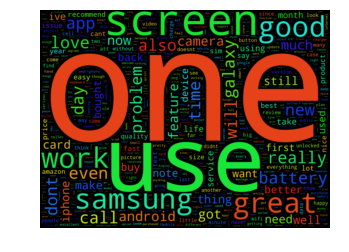

In [103]:
plt.imshow(wc_sam, interpolation='bilinear')
plt.axis("off")
plt.show()